In [ ]:
from autovc.utils.dataloader import SpeakerEncoderDataLoader
import torch
from autovc.speaker_encoder.model import SpeakerEncoder
from autovc.utils.model_loader import load_model
import wandb

datadir = {'hilde': ['data/hilde_7sek'], 'hague': ['data/HaegueYang_10sek', 'data/hyang_smk']}
Data = SpeakerEncoderDataLoader(datadir)


SE = load_model('speaker_encoder', 'models/SpeakerEncoder/SpeakerEncoder.pt')
run = wandb.init(project = 'SpeakerEncoder',  entity = "deep_voice_inc", reinit = True)

In [ ]:
from autovc.speaker_encoder.model import SpeakerEncoder
dataloader = Data.get_dataloader(batch_size = 2)
SE = SpeakerEncoder()


def batch_forward(batch):
    embeddings = []
    for b in batch:
        embed_speaker = torch.stack([SE.forward(torch.from_numpy(speaker).unsqueeze(0).to('cpu')) for speaker in b])
        embeddings.append(embed_speaker)
    return torch.cat(embeddings, dim = 1)
for i in range(5):
    for batch in dataloader:
        embeds = batch_forward(batch)
        print(embeds.shape)
        print(SE.similarity_matrix(embeds))

In [ ]:
from autovc.utils.model_loader import load_model
from autovc.utils.dataloader import SpeakerEncoderDataLoader
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
datadir = {'hilde': ['data/hilde_20211020'], 'hague': ['data/HaegueYang_10sek', 'data/hyang_smk']}
Data = SpeakerEncoderDataLoader(datadir)

dataloader = Data.get_dataloader(batch_size=264)
SE = load_model('speaker_encoder', 'models/SpeakerEncoder/SpeakerEncoder.pt')


def batch_forward(batch):

    return torch.stack([SE(b) for b in batch])

# for i in range(1):
#     for batch in dataloader:
#         embeds = batch_forward(batch)
#         print(embeds.shape)
#         X = TSNE(n_components=2 ).fit_transform(torch.flatten(embeds, start_dim  = 0, end_dim = 1).detach().numpy())
#         plt.scatter(X[:, 0], X[:, 1])
#         plt.show()
#         print(SE.loss(embeds))

In [ ]:
dataloader = Data.get_dataloader(batch_size=3628)
for batch in dataloader:
    embeds = batch_forward(batch)
    print(embeds.shape)
    X = TSNE(n_components=2 ).fit_transform(torch.flatten(embeds, start_dim  = 0, end_dim = 1).detach().numpy())
    
    plt.scatter(X[:len(X)//2,0], X[:len(X)//2,1])
    plt.scatter(X[len(X)//2:,0], X[len(X)//2:,1])
    plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(X[:len(X)//2,0], X[:len(X)//2,1], alpha = 0.6, zorder = 3)
ax.scatter(X[len(X)//2:,0], X[len(X)//2:,1], alpha = 0.6, zorder = 3)
ax.legend(["Hilde", "Hageueyaa"])
ax.grid(ls = '--')
plt.show()

In [ ]:
import wandb
run = wandb.init()
artifact = run.use_artifact('deep_voice_inc/data/smk_speakers:v0', type='dataset')
artifact_dir = artifact.download()

In [9]:
from autovc.utils.audio import audio_to_melspectrogram, get_mel_frames
from autovc.utils.hparams import WaveRNNParams
vocoder_params = WaveRNNParams()
wav = 'data/samples/chooped7.wav'
T = get_mel_frames(wav, audio_to_melspectrogram,  order = 'MF', sr = vocoder_params.sample_rate, mel_window_step = vocoder_params.mel_window_step, partial_utterance_n_frames = 250 )



tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [2]:
from autovc.utils.audio import get_mel_frames, audio_to_melspectrogram
from autovc.utils.model_loader import load_model
import torch
import numpy as np
import matplotlib.pyplot as plt
AE = load_model('auto_encoder', 'models/AutoVC/AutoVC_SMK.pt')
# SE = load_model('speaker_encoder', 'models/SpeakerEncoder/SpeakerEncoder.pt')
N = 160
frames = get_mel_frames('data/conversions/hej.wav', audio_to_melspectrogram, sr = 22050, mel_window_step = 12.5, order = 'MF', partial_utterance_n_frames = N)
T = torch.stack(frames)
# emb = torch.randn((T.size(0), 256))

# _, out, _ = AE(T, emb, emb)

window = np.hanning(N)

Loaded auto encoder "models/AutoVC/AutoVC_SMK.pt" trained to step 13801


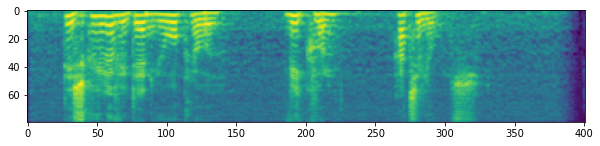

In [11]:
M = audio_to_melspectrogram('data/conversions/hej.wav')
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(M)
plt.show()

In [13]:
T.shape


torch.Size([4, 80, 160])